In [93]:
 #This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'IDR'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '1ee6763d-8043-4a57-8b11-3072d6761f98',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #normalize data
  # pd.json_normalize(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)




In [94]:
#Normalize ;data and makes it preety with Pandas

# pd.set_option('display.max_columns', None)
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')

df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.IDR.price,quote.IDR.volume_24h,quote.IDR.volume_change_24h,quote.IDR.percent_change_1h,quote.IDR.percent_change_24h,quote.IDR.percent_change_7d,quote.IDR.percent_change_30d,quote.IDR.percent_change_60d,quote.IDR.percent_change_90d,quote.IDR.market_cap,quote.IDR.market_cap_dominance,quote.IDR.fully_diluted_market_cap,quote.IDR.tvl,quote.IDR.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9748,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.916008e+07,1.916008e+07,NaN,1,NaN,NaN,None,2022-09-25T10:00:00.000Z,2.878579e+08,3.464942e+14,-37.6470,-0.359904,-0.716029,-5.543956,-11.098965,-10.557733,-11.250263,5.515380e+15,38.9633,6.045017e+15,None,2022-09-25T10:02:16.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-25 10:02:38.457295
1,1027,Ethereum,ETH,ethereum,6105,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.225173e+08,1.225173e+08,NaN,2,NaN,NaN,None,2022-09-25T10:00:00.000Z,2.001801e+07,1.626795e+14,-38.0491,-0.624234,-0.973409,-8.651938,-20.188104,-9.120458,7.437017,2.452553e+15,17.3244,2.452553e+15,None,2022-09-25T10:02:16.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-25 10:02:38.457295
2,825,Tether,USDT,tether,40075,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.795470e+10,7.015545e+10,NaN,3,NaN,NaN,None,2022-09-25T10:00:00.000Z,1.511335e+04,5.202802e+14,-36.2559,-0.170235,-0.808894,-1.430240,-0.001084,-0.003388,0.058951,1.027023e+15,7.2554,1.060284e+15,None,2022-09-25T10:02:16.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-09-25 10:02:38.457295
3,3408,USD Coin,USDC,usd-coin,6310,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.971448e+10,4.971448e+10,NaN,4,NaN,NaN,None,2022-09-25T10:00:00.000Z,1.511169e+04,5.247060e+13,-30.7515,-0.178602,-0.819242,-1.433875,-0.002242,-0.024668,-0.004091,7.512698e+14,5.3068,7.512698e+14,None,2022-09-25T10:02:16.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-09-25 10:02:38.457295
4,1839,BNB,BNB,bnb,1110,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.613373e+08,1.613373e+08,NaN,5,NaN,NaN,None,2022-09-25T10:00:00.000Z,4.192554e+06,1.010437e+13,-28.1843,-0.588728,-2.448850,-0.828931,-6.321454,9.955634,15.534163,6.764152e+14,4.7785,8.385109e+14,None,2022-09-25T10:02:16.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-25 10:02:38.457295
5,52,XRP,XRP,xrp,820,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,4.984875e+10,9.998929e+10,NaN,6,NaN,NaN,None,2022-09-25T10:00:00.000Z,7.380829e+03,4.213624e+13,-50.2830,0.035135,-1.928738,26.012633,34.800006,45.388320,33.920126,3.679251e+14,2.5989,7.380829e+14,None,2022-09-25T10:02:16.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-25 10:02:38.457295
6,4687,Binance USD,BUSD,binance-usd,5172,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,2.051725e+10,2.051725e+10,NaN,7,NaN,NaN,None,2022-09-25T10:00:00.000Z,1.511059e+04,9.491101e+13,-32.4906,-0.200615,-0.800726,-1.511467,-0.058397,-0.074949,-0.069365,3.100278e+14,2.1900,3.100278e+14,None,2022-09-25T10:02:16.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-09-25 10:02:38.457295
7,2010,Cardano,ADA,cardano,571,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.422915e+10,3.495058e+10,NaN,8,NaN,NaN,None,2022-09-25T10:00:00.000Z,6.915096e+03,7.777368e+12,-32.7386,-0.609743,-1.297339,-5.446047,-3.663529,-1.698054,-9.751362,2.366979e+14,1.6721,3.111793e+14,None,2022-09-25T10:02:16.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-25 10:02:38.457295
8,5426,Solana,SOL,solana,386,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,

In [95]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'IDR'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '1ee6763d-8043-4a57-8b11-3072d6761f98',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = df.append(df2)


    # Use this if you want to create a csv and append data to it
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r'API.csv'):
        df.to_csv(r'API.csv', header='column_names')
    else:
        df.to_csv(r'API.csv', mode='a', header=False)
        
    #Then to read in the file: df = pd.read_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv')

# If that didn't work try using the local host URL as shown in the video

In [99]:
import os 
from time import time
from time import sleep

for i in range(333):
  api_runner()
  print('Api Runner number ', i)
  sleep(3) #sleep for one minute 
exit()

Api Runner number  0
Api Runner number  1
Api Runner number  2
Api Runner number  3


KeyboardInterrupt: ignored

In [98]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.IDR.price,quote.IDR.volume_24h,quote.IDR.volume_change_24h,quote.IDR.percent_change_1h,quote.IDR.percent_change_24h,quote.IDR.percent_change_7d,quote.IDR.percent_change_30d,quote.IDR.percent_change_60d,quote.IDR.percent_change_90d,quote.IDR.market_cap,quote.IDR.market_cap_dominance,quote.IDR.fully_diluted_market_cap,quote.IDR.tvl,quote.IDR.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9748,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.916008e+07,1.916008e+07,NaN,1,NaN,NaN,None,2022-09-25T10:00:00.000Z,2.878579e+08,3.464942e+14,-37.6470,-0.359904,-0.716029,-5.543956,-11.098965,-10.557733,-11.250263,5.515380e+15,38.9633,6.045017e+15,None,2022-09-25T10:02:16.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-25 10:03:09.454359
1,1027,Ethereum,ETH,ethereum,6105,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.225173e+08,1.225173e+08,NaN,2,NaN,NaN,None,2022-09-25T10:00:00.000Z,2.001801e+07,1.626795e+14,-38.0491,-0.624234,-0.973409,-8.651938,-20.188104,-9.120458,7.437017,2.452553e+15,17.3244,2.452553e+15,None,2022-09-25T10:02:16.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-25 10:03:09.454359
2,825,Tether,USDT,tether,40075,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.795470e+10,7.015545e+10,NaN,3,NaN,NaN,None,2022-09-25T10:00:00.000Z,1.511335e+04,5.202802e+14,-36.2559,-0.170235,-0.808894,-1.430240,-0.001084,-0.003388,0.058951,1.027023e+15,7.2554,1.060284e+15,None,2022-09-25T10:02:16.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-09-25 10:03:09.454359
3,3408,USD Coin,USDC,usd-coin,6310,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.971448e+10,4.971448e+10,NaN,4,NaN,NaN,None,2022-09-25T10:00:00.000Z,1.511169e+04,5.247060e+13,-30.7515,-0.178602,-0.819242,-1.433875,-0.002242,-0.024668,-0.004091,7.512698e+14,5.3068,7.512698e+14,None,2022-09-25T10:02:16.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-09-25 10:03:09.454359
4,1839,BNB,BNB,bnb,1110,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.613373e+08,1.613373e+08,NaN,5,NaN,NaN,None,2022-09-25T10:00:00.000Z,4.192554e+06,1.010437e+13,-28.1843,-0.588728,-2.448850,-0.828931,-6.321454,9.955634,15.534163,6.764152e+14,4.7785,8.385109e+14,None,2022-09-25T10:02:16.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-25 10:03:09.454359
5,52,XRP,XRP,xrp,820,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,4.984875e+10,9.998929e+10,NaN,6,NaN,NaN,None,2022-09-25T10:00:00.000Z,7.380829e+03,4.213624e+13,-50.2830,0.035135,-1.928738,26.012633,34.800006,45.388320,33.920126,3.679251e+14,2.5989,7.380829e+14,None,2022-09-25T10:02:16.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-25 10:03:09.454359
6,4687,Binance USD,BUSD,binance-usd,5172,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,2.051725e+10,2.051725e+10,NaN,7,NaN,NaN,None,2022-09-25T10:00:00.000Z,1.511059e+04,9.491101e+13,-32.4906,-0.200615,-0.800726,-1.511467,-0.058397,-0.074949,-0.069365,3.100278e+14,2.1900,3.100278e+14,None,2022-09-25T10:02:16.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-09-25 10:03:09.454359
7,2010,Cardano,ADA,cardano,571,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.422915e+10,3.495058e+10,NaN,8,NaN,NaN,None,2022-09-25T10:00:00.000Z,6.915096e+03,7.777368e+12,-32.7386,-0.609743,-1.297339,-5.446047,-3.663529,-1.698054,-9.751362,2.366979e+14,1.6721,3.111793e+14,None,2022-09-25T10:02:16.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-25 10:03:09.454359
8,5426,Solana,SOL,solana,386,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,

In [100]:
dfcsv = pd.read_csv(r'API.csv')
dfcsv

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.IDR.price,quote.IDR.volume_24h,quote.IDR.volume_change_24h,quote.IDR.percent_change_1h,quote.IDR.percent_change_24h,quote.IDR.percent_change_7d,quote.IDR.percent_change_30d,quote.IDR.percent_change_60d,quote.IDR.percent_change_90d,quote.IDR.market_cap,quote.IDR.market_cap_dominance,quote.IDR.fully_diluted_market_cap,quote.IDR.tvl,quote.IDR.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9748,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.916008e+07,1.916008e+07,NaN,1,NaN,NaN,NaN,2022-09-25T10:02:00.000Z,2.878523e+08,3.464880e+14,-37.5549,-0.367966,-0.734090,-5.442942,-11.146406,-10.567203,-11.229002,5.515272e+15,38.9650,6.044899e+15,NaN,2022-09-25T10:04:16.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-25 10:04:31.335281
1,1,1027,Ethereum,ETH,ethereum,6105,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.225173e+08,1.225173e+08,NaN,2,NaN,NaN,NaN,2022-09-25T10:02:00.000Z,2.001436e+07,1.626664e+14,-37.8813,-0.645647,-0.995248,-8.497580,-20.248352,-9.129101,7.438391,2.452105e+15,17.3245,2.452105e+15,NaN,2022-09-25T10:04:16.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-25 10:04:31.335281
2,2,825,Tether,USDT,tether,40075,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,6.795470e+10,7.015545e+10,NaN,3,NaN,NaN,NaN,2022-09-25T10:02:00.000Z,1.511348e+04,5.202546e+14,-36.1845,-0.172088,-0.806492,-1.431191,-0.003459,-0.000851,0.063404,1.027032e+15,7.2559,1.060293e+15,NaN,2022-09-25T10:04:16.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-09-25 10:04:31.335281
3,3,3408,USD Coin,USDC,usd-coin,6310,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,4.971448e+10,4.971448e+10,NaN,4,NaN,NaN,NaN,2022-09-25T10:02:00.000Z,1.511198e+04,5.242099e+13,-30.9225,-0.172932,-0.812557,-1.424347,-0.015316,-0.002179,-0.002198,7.512844e+14,5.3069,7.512844e+14,NaN,2022-09-25T10:04:16.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-09-25 10:04:31.335281
4,4,1839,BNB,BNB,bnb,1110,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",2.000000e+08,1.613373e+08,1.613373e+08,NaN,5,NaN,NaN,NaN,2022-09-25T10:02:00.000Z,4.191512e+06,1.010928e+13,-28.0553,-0.758063,-2.470825,-0.711088,-6.402573,9.927323,15.532314,6.762470e+14,4.7776,8.383024e+14,NaN,2022-09-25T10:04:16.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-25 10:04:31.335281
5,5,52,XRP,XRP,xrp,820,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,4.984875e+10,9.998929e+10,NaN,6,NaN,NaN,NaN,2022-09-25T10:02:00.000Z,7.390581e+03,4.215526e+13,-50.1657,0.024664,-1.889204,26.469715,34.990989,45.590076,34.104767,3.684112e+14,2.6024,7.390581e+14,NaN,2022-09-25T10:04:16.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-25 10:04:31.335281
6,6,4687,Binance USD,BUSD,binance-usd,5172,2019-09-20T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'bin...",NaN,2.051725e+10,2.051725e+10,NaN,7,NaN,NaN,NaN,2022-09-25T10:02:00.000Z,1.511400e+04,9.488033e+13,-32.4919,-0.156076,-0.760550,-1.452324,-0.034838,-0.057361,0.159883,3.100978e+14,2.1909,3.100978e+14,NaN,2022-09-25T10:04:16.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-09-25 10:04:31.335281
7,7,2010,Cardano,ADA,cardano,571,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.422915e+10,3.495058e+10,NaN,8,NaN,NaN,NaN,2022-09-25T10:02:00.000Z,6.914639e+03,7.780496e+12,-32.3885,-0.620982,-1.294550,-5.247189,-3.796609,-1.764807,-9.810912,2.366822e+14,1.6721,3.111588e+14,NaN,2022-09-25T10:04:16.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-25 10:04:31.335281
8,8,5426,Solana,SOL,solana,386,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cm

In [70]:
df3 = df.groupby('name',sort=False)[['quote.IDR.percent_change_1h','quote.IDR.percent_change_24h', 'quote.IDR.percent_change_7d','quote.IDR.percent_change_30d','quote.IDR.percent_change_60d','quote.IDR.percent_change_90d']].mean()

In [72]:
df3

,quote.IDR.percent_change_1h,quote.IDR.percent_change_24h,quote.IDR.percent_change_7d,quote.IDR.percent_change_30d,quote.IDR.percent_change_60d,quote.IDR.percent_change_90d
name,,,,,,
Bitcoin,-0.279422,-0.480034,-6.127782,-11.063741,-10.544496,-11.089962
Ethereum,-0.208005,-0.392789,-9.824466,-19.971708,-8.843085,8.057146
Tether,-0.172828,-0.811750,-1.432004,-0.001364,-0.002482,0.056200
USD Coin,-0.163461,-0.809086,-1.423941,0.008387,-0.004797,0.006739
BNB,-0.131328,-1.933029,-1.342665,-6.070367,10.360952,15.811413
XRP,0.744163,-1.508835,25.349694,34.727520,45.938088,34.608377
Binance USD,-0.202972,-0.779934,-1.425306,0.010250,-0.000038,-0.023209
Cardano,-0.170930,-0.739147,-6.671747,-3.605866,-1.351584,-9.027000
Solana,-0.699863,-0.806615,-1.073296,-2.783596,-7.889144,-17.629117


In [73]:
df4 = df3.stack()
df4

name                                 
Bitcoin  quote.IDR.percent_change_1h     -0.279422
         quote.IDR.percent_change_24h    -0.480034
         quote.IDR.percent_change_7d     -6.127782
         quote.IDR.percent_change_30d   -11.063741
         quote.IDR.percent_change_60d   -10.544496
                                           ...    
TRON     quote.IDR.percent_change_24h    -1.117814
         quote.IDR.percent_change_7d     -4.894972
         quote.IDR.percent_change_30d    -8.334697
         quote.IDR.percent_change_60d    -8.856046
         quote.IDR.percent_change_90d   -13.027740
Length: 90, dtype: float64

In [74]:
type(df4)

pandas.core.series.Series

In [75]:
df5 = df4.to_frame(name='values')
df5

values
name                                           
Bitcoin quote.IDR.percent_change_1h   -0.279422
        quote.IDR.percent_change_24h  -0.480034
        quote.IDR.percent_change_7d   -6.127782
        quote.IDR.percent_change_30d -11.063741
        quote.IDR.percent_change_60d -10.544496
...                                         ...
TRON    quote.IDR.percent_change_24h  -1.117814
        quote.IDR.percent_change_7d   -4.894972
        quote.IDR.percent_change_30d  -8.334697
        quote.IDR.percent_change_60d  -8.856046
        quote.IDR.percent_change_90d -13.027740

[90 rows x 1 columns]

In [76]:
type(df5)

pandas.core.frame.DataFrame

In [79]:
#give index
index = pd.Index(range(90))
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.IDR.percent_change_1h,-0.279422
1,Bitcoin,quote.IDR.percent_change_24h,-0.480034
2,Bitcoin,quote.IDR.percent_change_7d,-6.127782
3,Bitcoin,quote.IDR.percent_change_30d,-11.063741
4,Bitcoin,quote.IDR.percent_change_60d,-10.544496
...,...,...,...
85,TRON,quote.IDR.percent_change_24h,-1.117814
86,TRON,quote.IDR.percent_change_7d,-4.894972
87,TRON,quote.IDR.percent_change_30d,-8.334697
88,TRON,quote.IDR.percent_change_60d,-8.856046


In [80]:
df7 = df6.rename(columns={'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.IDR.percent_change_1h,-0.279422
1,Bitcoin,quote.IDR.percent_change_24h,-0.480034
2,Bitcoin,quote.IDR.percent_change_7d,-6.127782
3,Bitcoin,quote.IDR.percent_change_30d,-11.063741
4,Bitcoin,quote.IDR.percent_change_60d,-10.544496
...,...,...,...
85,TRON,quote.IDR.percent_change_24h,-1.117814
86,TRON,quote.IDR.percent_change_7d,-4.894972
87,TRON,quote.IDR.percent_change_30d,-8.334697
88,TRON,quote.IDR.percent_change_60d,-8.856046


In [86]:
df7['percent_change'] = df7['percent_change'].replace(['quote.IDR.percent_change_1h'],['1h'])
df7['percent_change'] = df7['percent_change'].replace(['quote.IDR.percent_change_24h','quote.IDR.percent_change_7d','quote.IDR.percent_change_30d','quote.IDR.percent_change_60d','quote.IDR.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.279422
1,Bitcoin,24h,-0.480034
2,Bitcoin,7d,-6.127782
3,Bitcoin,30d,-11.063741
4,Bitcoin,60d,-10.544496
...,...,...,...
85,TRON,24h,-1.117814
86,TRON,7d,-4.894972
87,TRON,30d,-8.334697
88,TRON,60d,-8.856046


In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

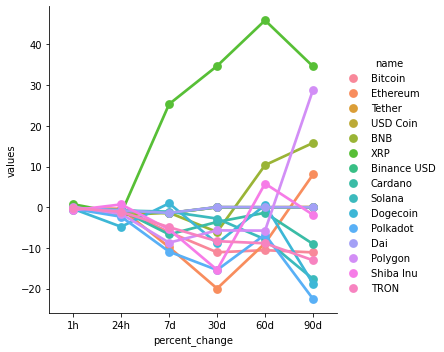

In [88]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [108]:
df8 = df[['name','quote.IDR.price','timestamp']]
df8 = df8.query("name=='Bitcoin'")
df8

,name,quote.IDR.price,timestamp
0,Bitcoin,2.878523e+08,2022-09-25 10:04:40.845589


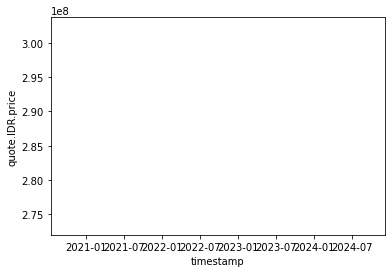

In [110]:
sns.lineplot(x='timestamp',y='quote.IDR.price', data=df8)